## For Nutrient and d15N data from cruises
Data analysis and plotting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import cartopy
import cartopy.feature as cfeature
import cmocean.cm as cmo
from matplotlib.ticker import LogFormatter 
import matplotlib.ticker as mticker

#### Helpful HTML links

In [2]:
# https://stackoverflow.com/questions/21285885/remove-line-through-marker-in-matplotlib-legend# 
# https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
# https://stackoverflow.com/questions/33997361/how-to-convert-degree-minute-second-to-degree-decimal
# https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
# https://www.science-emergence.com/Codes/Plot-MODIS-L3-chlorophyll-concentration-with-python/

In [2]:
df = pd.read_csv('~/Documents/GitHub/data/cruise_nutrients.txt',
#                  sep=',',     # field separator
                 comment='#', # comment
                 delimiter = '\t'
#                  index_col=0, # number or label of index column
                 ).sort_values('depth')
df

,depth,sample id,phosphate,silicate,total n,ammonia,site,lat,lon,lat_rounded,lon_rounded,cruise,date,ammonia_
79,0.0,AT41-CTD011-N24,0.037546,0.933476,0.092426,0.03238784,Stetson Banks II,32.072700,-78.309400,32.0727,-78.3094,Atlantis,8/27/18,0.032388
43,2.7,AT41-CTD05-N24,0.033774,0.700125,0.275740,0.601308197,Stetson Deep,32.036517,-77.354583,32.0365,-77.3546,Atlantis,8/23/18,0.601308
55,3.0,AT41-CTD08-N24,0.026183,0.744192,0.176524,0.374713492,Blake Escarpment,31.324900,-77.240300,31.3249,-77.2403,Atlantis,8/25/18,0.374713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1386.0,RB1903_CTD09_N07,1.131056,11.628307,7.052700,-0.002960159,Blake Deep,31.313407,-77.221302,31.3134,-77.2213,Ron Brown,4/18/19,NaN
93,1903.0,BCMM-05OCT18-09-CTD06-N4,0.919276,9.076730,10.959837,0.205360222,Pamlico Canyon,34.923123,-75.151212,34.9231,-75.1512,Brooks McCall,NaN,0.205360
80,2267.0,AT41-CTD013-N3,0.732601,10.402726,9.050889,0.264751066,Blake Ridge,32.490620,-76.192600,32.4906,-76.1926,Atlantis,8/28/18,0.264751


In [3]:
depth = df['depth']
po4 = df['phosphate']
sil = df['silicate']
total_n = df['total n']
nh4 = df['ammonia_']

df['n_star'] = df['total n'] - 16*df['phosphate'] + 2.9 # 2.9 umol kg^-1
df['p_star'] = df['phosphate'] - (df['total n']/16)

In [4]:
# atlantis = df[df.cruise == 'Atlantis']
# endeavor = df[df.cruise == 'Endeavor']
# brooks = df[df.cruise == 'Brooks McCall']

In [4]:
pom = pd.read_csv('~/Documents/GitHub/data/PC-1704 POM for Schiff.csv').sort_values('Depth')
pom

,Cruise,Ship,Site,Station/CAST,Sample ID,DOC,Depth,Lat,Long,Weight (mg),d13C,%C,d15N,%N
0,PC-1704,R/V Piceses,NK,PC1704-001,PC1704-001-W005,01-Sep-17,10.0,35.72883,-74.63067,25.07,-24.7,0.5,3.2,0.1
37,PC-1704,R/V Piceses,PC,PC1704-015,PC1704-015-W125,05-Sep-17,10.0,34.98017,-75.23717,29.60,-21.9,0.6,5.5,0.1
38,PC-1704,R/V Piceses,PC,PC1704-015,PC1704-015-W126,05-Sep-17,10.0,34.98017,-75.23717,30.50,-24.2,0.5,3.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,PC-1704,R/V Piceses,NK,PC1704-005,PC1704-005-W016,01-Sep-17,1538.0,35.72383,-74.72433,27.12,-23.8,0.3,5.7,0.1
12,PC-1704,R/V Piceses,NK,PC1704-005,PC1704-005-W017,01-Sep-17,1538.0,35.72383,-74.72433,21.81,-24.5,0.4,7.9,0.1
2,PC-1704,R/V Piceses,NK,PC1704-001,PC1704-001-W007,01-Sep-17,1756.0,35.72883,-74.63067,27.36,-25.4,0.4,5.8,0.0


In [5]:
# df['site'].values # So I know what the different sites are, note to not use () here
df['site'].unique() # Alternatively

array(['Stetson Banks II', 'Stetson Deep', 'Blake Escarpment',
       'Stetson Banks', 'SAV (Savannah deep)',
       'VAC (Virginia Inter-Canyon)', 'Blake Deep', 'CHB (Stetson)',
       'Savannah Banks', 'Richardson Hills-RB', 'JAX (Jacksonville)',
       'Stetson Shallow', 'BLE (30N deep)', 'WIL', 'Pamlico Canyon',
       'Richardson Bend', 'Richardson Hills', 'HC', 'KC', 'NK',
       'Blake Ridge', 'Pea Island Seep'], dtype=object)

In [5]:
pom['Site'].unique()

array(['NK', 'PC', 'AM', 'Kitty Hawk', 'KC', 'HC'], dtype=object)

In [6]:
lats = df['lat'].unique()
lons = df['lon'].unique()

print(lats.shape)
print(lons.shape)
print(lats)
print(lons)

(30,)
(30,)
[32.0727   32.036517 31.3249   32.0118   32.0407   37.240383 31.313407
 32.063417 31.744437 31.89457  30.498317 31.89211  29.249533 33.590333
 34.923123 31.806705 31.985552 35.28017  35.2945   35.54517  35.72367
 35.3      35.53733  35.71367  35.71533  35.5295   32.49062  31.806712
 31.985337 35.709223]
[-78.3094   -77.354583 -77.2403   -78.3132   -77.350067 -74.5177
 -77.221302 -78.38265  -79.209958 -77.365077 -79.997783 -78.454433
 -78.348283 -76.447017 -75.151212 -77.593605 -77.418493 -74.91634
 -74.94517  -74.78633  -74.78883  -74.9625   -74.81518  -74.82584
 -74.81517  -74.835    -76.1926   -77.593747 -77.418173 -74.780567]


In [7]:
coord = np.column_stack((lats, lons))

In [8]:
# endeavor = endeavor.sort_values('lat')

# endeavor_lats = endeavor['lat']
# endeavor_lons = endeavor['lon']

# coord = np.column_stack((endeavor_lats, endeavor_lons))

# endeavor_lats

In [9]:
# Don't need this code currently but I am saving it

import re as re
split = re.split(' ', '29 14.972')
split

['29', '14.972']

# Plotting POM data

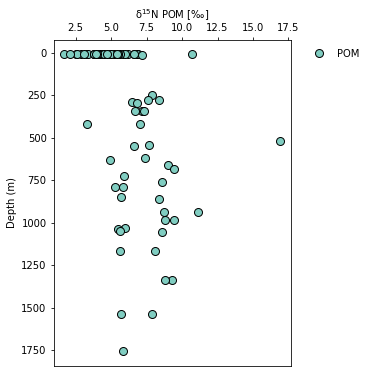

In [8]:
# POM

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

col1 = '#80cdc1'
col2 = '#dfc27d'
markersize = 8
linewidth = 0.0 

plt.plot('d15N', 'Depth', data=pom, marker='o', markerfacecolor=col1, label = 'POM', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel(r'$\mathrm{\delta}^{15}$N POM ['u"\u2030]")

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

plt.savefig('ctd-POM-d15N.png', dpi=300, bbox_inches='tight')
plt.show()

# Plotting Nutrient data

In [7]:
df['site'].unique()

array(['Stetson Banks II', 'Stetson Deep', 'Blake Escarpment',
       'Stetson Banks', 'SAV (Savannah deep)',
       'VAC (Virginia Inter-Canyon)', 'Blake Deep', 'CHB (Stetson)',
       'Savannah Banks', 'Richardson Hills-RB', 'JAX (Jacksonville)',
       'Stetson Shallow', 'BLE (30N deep)', 'WIL', 'Pamlico Canyon',
       'Richardson Bend', 'Richardson Hills', 'HC', 'KC', 'NK',
       'Blake Ridge', 'Pea Island Seep'], dtype=object)

In [9]:
# Filter out the data
# Likely an easier way to do this, will figure that out later 08/26/2019

stet_banks = df[df.site == 'Stetson Banks']
stet_banks2 = df[df.site == 'Stetson Banks II']
stet_deep = df[df.site == 'Stetson Deep']
jax = df[df.site == 'JAX (Jacksonville)']
sav = df[df.site == 'SAV (Savannah deep)']
ble = df[df.site == 'BLE (30N deep)']
chb = df[df.site == 'CHB (Stetson)']
bend = df[df.site == 'Richardson Bend']
hills = df[df.site == 'Richardson Hills']
blake = df[df.site == 'Blake Escarpment']
vac = df[df.site == 'VAC (Virginia Inter-Canyon)']
wil = df[df.site == 'WIL']
pea = df[df.site == 'Pea Island Seep']
pamlico = df[df.site == 'Pamlico Canyon']
hc = df[df.site == 'HC']
kc = df[df.site == 'KC']
nk = df[df.site == 'NK']
blake_deep = df[df.site == 'Blake Deep']
stet_shallow = df[df.site == 'Stetson Shallow']
hills_rb = df[df.site == 'Richardson Hills-RB']
sav_banks = df[df.site == "Savannah Banks"]

stet_banks

,depth,sample id,phosphate,silicate,total n,ammonia,site,lat,lon,lat_rounded,lon_rounded,cruise,date,ammonia_,n_star,p_star
67,3.1,AT41-CTD010-N24,0.039548,0.610324,0.065088,0.045787633,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.045788,2.332315,0.035480
66,30.0,AT41-CTD010-N22,0.033168,0.676757,0.065269,<0.019,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.018000,2.434577,0.029089
65,74.0,AT41-CTD010-N21,0.056360,0.737849,0.135245,<0.019,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.018000,2.133484,0.047907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,450.0,AT41-CTD010-N7,1.861549,16.151710,28.439753,<0.019,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.018000,1.554971,0.084064
57,501.0,AT41-CTD010-N5,1.727334,14.540285,27.639149,0.448742842,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.448743,2.901798,-0.000112
56,553.0,AT41-CTD010-N3,1.263917,11.059380,16.436386,0.050775,Stetson Banks,32.0118,-78.3132,32.0118,-78.3132,Atlantis,8/26/18,0.050775,-0.886293,0.236643


NameError: name 'ax1' is not defined

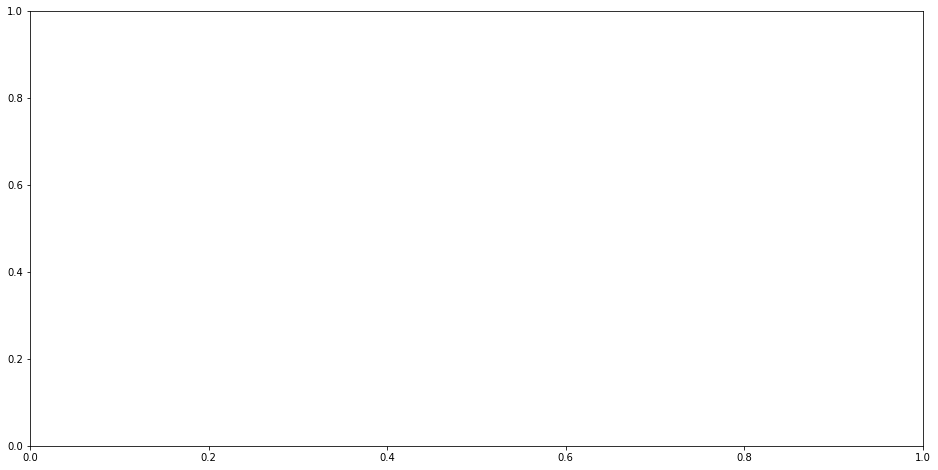

In [26]:
# N + N
fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

col1 = '#66c2a5'
col2 = '#fdae61'
msize = 8
width = 0.5 

ax1.plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=wil, marker='P', markerfacecolor=col1, label = 'WIL', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=vac, marker='^', markerfacecolor=col1, label = 'VAC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=pamlico, marker='*', markerfacecolor=col2, label = 'Pamlico Canyon', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=pea, marker='<', markerfacecolor=col2, label = 'Pea Island Seep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
ax1.plot('total n', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)


# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('N+N (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

# Save figure
plt.savefig('ctd-n2.png', dpi=200, bbox_inches='tight')

plt.show()

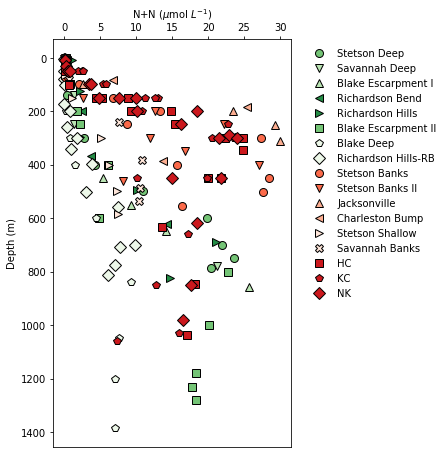

In [36]:
# N + N
fig1 = plt.figure(figsize = (4.25,7.5))
axs = fig1.add_subplot(111)

col1 = '#66c2a5'
col2 = '#fdae61'

april = '#edf8e9'
june = '#bae4b3'
august = '#74c476'
september = '#238b45'

april2 = '#fee5d9'
june2 = '#fcae91'
august2 = '#fb6a4a'
september2 = '#cb181d'

msize = 8
width = 0.0

# Nitrogen
# Further out on Blake Plateau
axs.plot('total n', 'depth', data=stet_deep, marker='o', markerfacecolor=august, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=sav, marker='v', markerfacecolor=june, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=ble, marker='^', markerfacecolor=june, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=bend, marker='<', markerfacecolor=september, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=hills, marker='>', markerfacecolor=september, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=blake, marker='s', markerfacecolor=august, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=blake_deep, marker='p', markerfacecolor=april, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=hills_rb, marker='D', markerfacecolor=april, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs.plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor=august2, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor=august2, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=jax, marker='^', markerfacecolor=june2, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=chb, marker='<', markerfacecolor=june2, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=stet_shallow, marker='>', markerfacecolor=april2, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=sav_banks, marker='X', markerfacecolor=april2, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=hc, marker='s', markerfacecolor=september2, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=kc, marker='p', markerfacecolor=september2, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs.plot('total n', 'depth', data=nk, marker='D', markerfacecolor=september2, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)


# Draw x label
axs.xaxis.set_label_position('top') # this moves the label to the top
axs.xaxis.set_ticks_position('top') # this moves the ticks to the top
axs.set_xlabel('N+N (' r'$\mu$mol $L^{-1}$)')

# Draw y label
axs.set_ylim(axs.get_ylim()[::-1])
axs.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

# Save figure
plt.savefig('ctd-n.png', dpi=200, bbox_inches='tight')

plt.show()

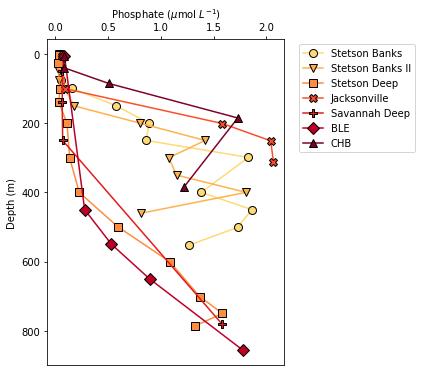

In [65]:
# Phosphate
fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

plt.plot('phosphate', 'depth', data=stet_banks, marker='o', color='#fed976', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=stet_banks2, marker='v', color='#feb24c', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=stet_deep, marker='s', color='#fd8d3c', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=jax, marker='X', color='#fc4e2a', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=sav, marker='P', color='#e31a1c', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=ble, marker='D', color='#bd0026', label = 'BLE', markeredgecolor = 'black', markersize = 8)
plt.plot('phosphate', 'depth', data=chb, marker='^', color='#800026', label = 'CHB', markeredgecolor = 'black', markersize = 8)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('ctd-phosphate.pdf', bbox_inches='tight')

plt.show()

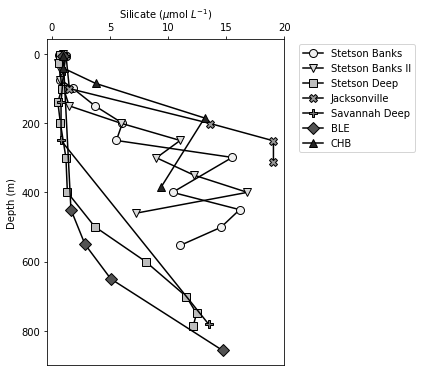

In [66]:
# Silicate

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

plt.plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor='#f0f0f0', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=stet_deep, marker='s', markerfacecolor='#bdbdbd', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=jax, marker='X', markerfacecolor='#969696', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=sav, marker='P', markerfacecolor='#737373', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black')
plt.plot('silicate', 'depth', data=chb, marker='^', markerfacecolor='#252525', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black')

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('ctd-silicate.pdf', bbox_inches='tight')

plt.show()

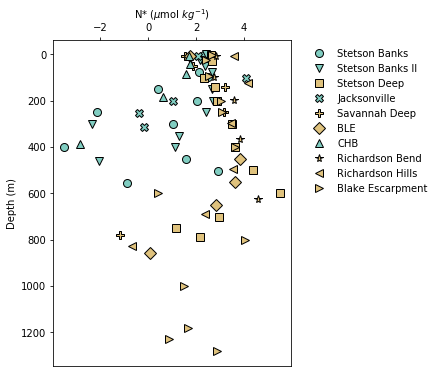

In [34]:
# N*

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

col1 = '#80cdc1'
col2 = '#dfc27d'
markersize = 8
linewidth = 0.0 

plt.plot('n_star', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'CHB', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('n_star', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('N* (' r'$\mu$mol $kg^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

plt.savefig('ctd-n_star.png', dpi=200, bbox_inches='tight')
plt.show()

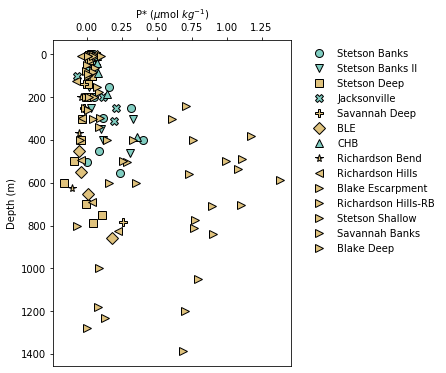

In [50]:
# P*

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

col1 = '#80cdc1'
col2 = '#dfc27d'
markersize = 8
linewidth = 0.0 

plt.plot('p_star', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'CHB', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=hills_rb, marker='>', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=stet_shallow, marker='>', markerfacecolor=col2, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=sav_banks, marker='>', markerfacecolor=col2, label = 'Savannah Banks', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=blake_deep, marker='>', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)


# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('P* (' r'$\mu$mol $kg^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

plt.savefig('ctd-p_star.png', dpi=200, bbox_inches='tight')
plt.show()

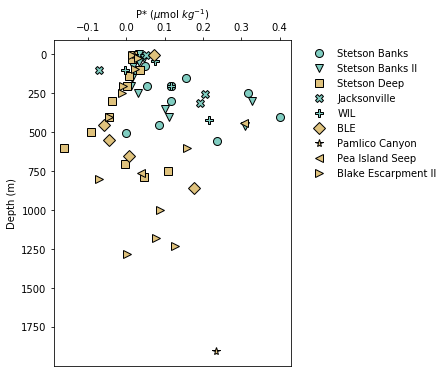

In [16]:
# P*

fig1 = plt.figure(figsize = (4.25,6))
ax1 = fig1.add_subplot(111)

col1 = '#80cdc1'
col2 = '#dfc27d'
markersize = 8
linewidth = 0.0 

plt.plot('p_star', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=wil, marker='P', markerfacecolor=col1, label = 'WIL', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
# plt.plot('p_star', 'depth', data=vac, marker='^', markerfacecolor=col1, label = 'VAC', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=pamlico, marker='*', markerfacecolor=col2, label = 'Pamlico Canyon', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=pea, marker='<', markerfacecolor=col2, label = 'Pea Island Seep', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)
plt.plot('p_star', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = linewidth)

# Draw x label
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.set_xlabel('P* (' r'$\mu$mol $kg^{-1}$)')

# Draw y label
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)')

# Legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)

plt.savefig('ctd-p_star2.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# Some code from matplotlib to try out
# import matplotlib.pyplot as pyplot

# Fig, ax = pyplot.subplots()
# for i, (mark, color) in enumerate(zip(
#     ['s', 'o', 'D', 'v'], ['r', 'g', 'b', 'purple'])):
#     ax.plot(i+1, i+1, color=color,
#             marker=mark,
#             markerfacecolor='None',
#             markeredgecolor=color,
#             label=i)

# ax.set_xlim(0,5)
# ax.set_ylim(0,5)
# ax.legend()

In [60]:
df['site'].unique()

array(['Stetson Banks II', 'Stetson Deep', 'Blake Escarpment',
       'Stetson Banks', 'SAV (Savannah deep)',
       'VAC (Virginia Inter-Canyon)', 'Blake Deep', 'CHB (Stetson)',
       'Savannah Banks', 'Richardson Hills-RB', 'JAX (Jacksonville)',
       'Stetson Shallow', 'BLE (30N deep)', 'WIL', 'Pamlico Canyon',
       'Richardson Bend', 'Richardson Hills', 'HC', 'KC', 'NK',
       'Blake Ridge', 'Pea Island Seep'], dtype=object)

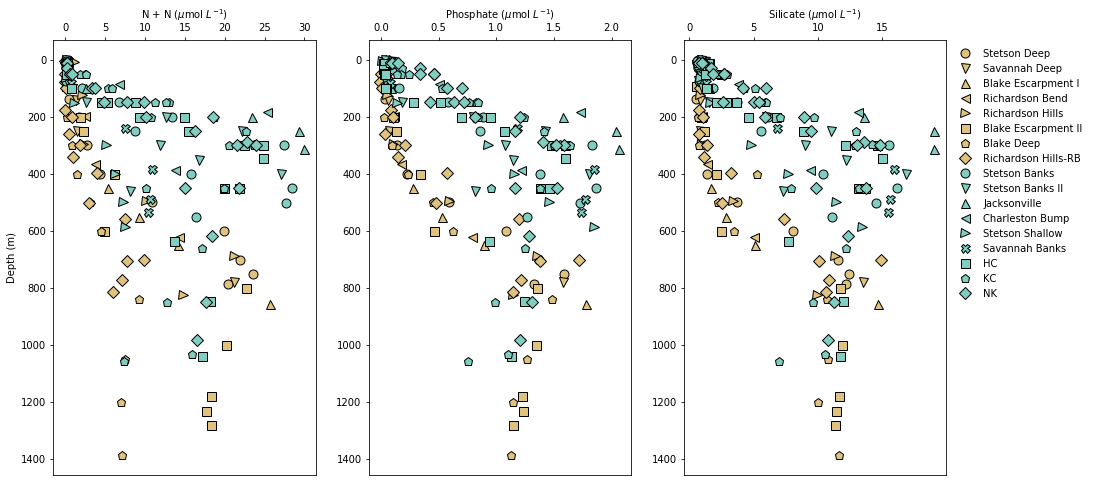

In [22]:
# All three together

figs, axs = plt.subplots(1,3, figsize = (16, 8)) # one row, three columns
# figs.suptitle ('Nutrient Depth Profiles')

col1 = '#80cdc1'
col2 = '#dfc27d'
msize = 9
width = 0.0
# Marker list: o, v, ^, <, >, s, p, D, X

# Nitrogen
# Further out on Blake Plateau
axs[0].plot('total n', 'depth', data=stet_deep, marker='o', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=sav, marker='v', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=ble, marker='^', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=bend, marker='<', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hills, marker='>', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=blake, marker='s', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=blake_deep, marker='p', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hills_rb, marker='D', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[0].plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=jax, marker='^', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=chb, marker='<', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_shallow, marker='>', markerfacecolor=col1, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=sav_banks, marker='X', markerfacecolor=col1, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hc, marker='s', markerfacecolor=col1, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=kc, marker='p', markerfacecolor=col1, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=nk, marker='D', markerfacecolor=col1, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Draw x label

axs[0].xaxis.set_label_position('top') # this moves the label to the top
axs[0].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[0].set_xlabel('N + N (' r'$\mu$mol $L^{-1}$)')

axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_ylabel('Depth (m)')

# Phosphate
# Further out on Blake Plateau
axs[1].plot('phosphate', 'depth', data=stet_deep, marker='o', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=sav, marker='v', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=ble, marker='^', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=bend, marker='<', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hills, marker='>', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=blake, marker='s', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=blake_deep, marker='p', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hills_rb, marker='D', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[1].plot('phosphate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=jax, marker='^', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=chb, marker='<', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_shallow, marker='>', markerfacecolor=col1, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=sav_banks, marker='X', markerfacecolor=col1, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hc, marker='s', markerfacecolor=col1, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=kc, marker='p', markerfacecolor=col1, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=nk, marker='D', markerfacecolor=col1, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Draw x label
axs[1].xaxis.set_label_position('top') # this moves the label to the top
axs[1].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[1].set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# # Draw y label
axs[1].set_ylim(axs[1].get_ylim()[::-1])
# axs[1].set_ylabel('Depth (m)')

# Silicate
# Further out on Blake Plateau
axs[2].plot('silicate', 'depth', data=stet_deep, marker='o', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=sav, marker='v', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=ble, marker='^', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=bend, marker='<', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hills, marker='>', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=blake, marker='s', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=blake_deep, marker='p', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hills_rb, marker='D', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[2].plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=jax, marker='^', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=chb, marker='<', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_shallow, marker='>', markerfacecolor=col1, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=sav_banks, marker='X', markerfacecolor=col1, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hc, marker='s', markerfacecolor=col1, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=kc, marker='p', markerfacecolor=col1, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=nk, marker='D', markerfacecolor=col1, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

axs[2].xaxis.set_label_position('top') # this moves the label to the top
axs[2].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[2].set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_ylabel('Depth (m)')

# # Ammonia
# axs[3].plot('ammonia_', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# axs[3].xaxis.set_label_position('top') # this moves the label to the top
# axs[3].xaxis.set_ticks_position('top') # this moves the ticks to the top
# axs[3].set_xlabel('Ammonia (' r'$\mu$mol $L^{-1}$)')

# axs[3].set_ylim(axs[3].get_ylim()[::-1])
# Legend

axs[0].legend(bbox_to_anchor=(3.4,1), loc="upper left", frameon = False)
# axs[0].legend(loc = 'best', frameon = False, fontsize = 'small')

# figs.show()
figs.savefig('ctd-nutrients.png',dpi=300, bbox_inches='tight')

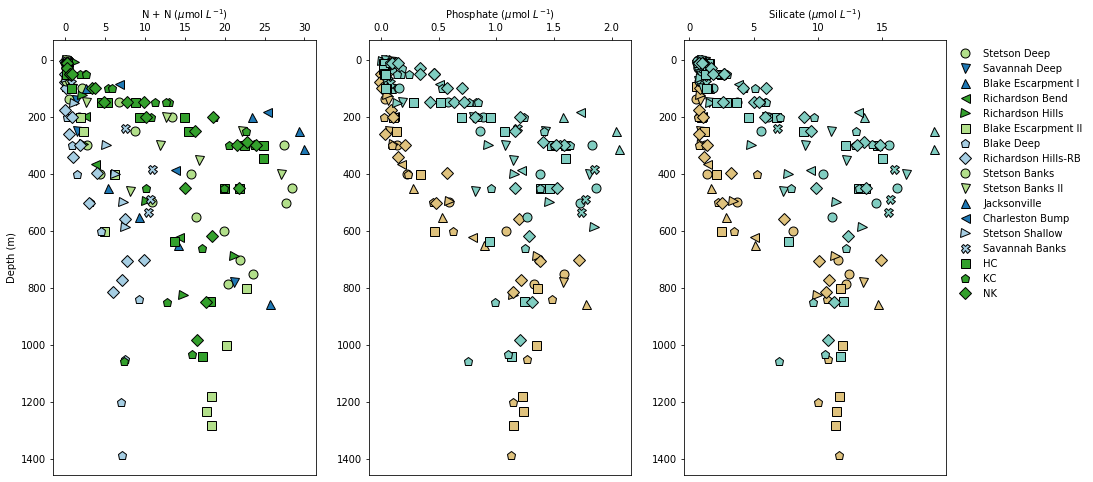

In [23]:
# Doing this by month/season

figs, axs = plt.subplots(1,3, figsize = (16, 8)) # one row, three columns
# figs.suptitle ('Nutrient Depth Profiles')

col1 = '#80cdc1'
col2 = '#dfc27d'

april = '#a6cee3'
june = '#1f78b4'
august = '#b2df8a'
september = '#33a02c'

april2 = '#ffffd4'
june2 = '#fed98e'
august2 = '#fe9929'
september2 = '#cc4c02'

msize = 9
width = 0.0
# Marker list: o, v, ^, <, >, s, p, D, X

# Nitrogen
# Further out on Blake Plateau
axs[0].plot('total n', 'depth', data=stet_deep, marker='o', markerfacecolor=august, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=sav, marker='v', markerfacecolor=june, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=ble, marker='^', markerfacecolor=june, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=bend, marker='<', markerfacecolor=september, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hills, marker='>', markerfacecolor=september, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=blake, marker='s', markerfacecolor=august, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=blake_deep, marker='p', markerfacecolor=april, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hills_rb, marker='D', markerfacecolor=april, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[0].plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor=august, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor=august, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=jax, marker='^', markerfacecolor=june, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=chb, marker='<', markerfacecolor=june, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=stet_shallow, marker='>', markerfacecolor=april, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=sav_banks, marker='X', markerfacecolor=april, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=hc, marker='s', markerfacecolor=september, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=kc, marker='p', markerfacecolor=september, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[0].plot('total n', 'depth', data=nk, marker='D', markerfacecolor=september, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Draw x label

axs[0].xaxis.set_label_position('top') # this moves the label to the top
axs[0].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[0].set_xlabel('N + N (' r'$\mu$mol $L^{-1}$)')

axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_ylabel('Depth (m)')

# Phosphate
# Further out on Blake Plateau
axs[1].plot('phosphate', 'depth', data=stet_deep, marker='o', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=sav, marker='v', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=ble, marker='^', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=bend, marker='<', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hills, marker='>', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=blake, marker='s', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=blake_deep, marker='p', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hills_rb, marker='D', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[1].plot('phosphate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=jax, marker='^', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=chb, marker='<', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=stet_shallow, marker='>', markerfacecolor=col1, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=sav_banks, marker='X', markerfacecolor=col1, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=hc, marker='s', markerfacecolor=col1, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=kc, marker='p', markerfacecolor=col1, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[1].plot('phosphate', 'depth', data=nk, marker='D', markerfacecolor=col1, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Draw x label
axs[1].xaxis.set_label_position('top') # this moves the label to the top
axs[1].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[1].set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# # Draw y label
axs[1].set_ylim(axs[1].get_ylim()[::-1])
# axs[1].set_ylabel('Depth (m)')

# Silicate
# Further out on Blake Plateau
axs[2].plot('silicate', 'depth', data=stet_deep, marker='o', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=sav, marker='v', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=ble, marker='^', markerfacecolor=col2, label = 'Blake Escarpment I', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=bend, marker='<', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hills, marker='>', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=blake, marker='s', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=blake_deep, marker='p', markerfacecolor=col2, label = 'Blake Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hills_rb, marker='D', markerfacecolor=col2, label = 'Richardson Hills-RB', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# Along the continental shelf
axs[2].plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=jax, marker='^', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=chb, marker='<', markerfacecolor=col1, label = 'Charleston Bump', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=stet_shallow, marker='>', markerfacecolor=col1, label = 'Stetson Shallow', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=sav_banks, marker='X', markerfacecolor=col1, label = 'Savannah Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=hc, marker='s', markerfacecolor=col1, label = 'HC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=kc, marker='p', markerfacecolor=col1, label = 'KC', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
axs[2].plot('silicate', 'depth', data=nk, marker='D', markerfacecolor=col1, label = 'NK', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

axs[2].xaxis.set_label_position('top') # this moves the label to the top
axs[2].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[2].set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_ylabel('Depth (m)')

# # Ammonia
# axs[3].plot('ammonia_', 'depth', data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=stet_banks2, marker='v', markerfacecolor=col1, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=stet_deep, marker='s', markerfacecolor=col2, label = 'Stetson Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=jax, marker='X', markerfacecolor=col1, label = 'Jacksonville', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=sav, marker='P', markerfacecolor=col2, label = 'Savannah Deep', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=ble, marker='D', markerfacecolor=col2, label = 'BLE', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=chb, marker='^', markerfacecolor=col1, label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=bend, marker='*', markerfacecolor=col2, label = 'Richardson Bend', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=hills, marker='<', markerfacecolor=col2, label = 'Richardson Hills', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)
# axs[3].plot('ammonia_', 'depth', data=blake, marker='>', markerfacecolor=col2, label = 'Blake Escarpment II', markeredgecolor = 'black', markersize = msize, color = 'black', linewidth = width)

# axs[3].xaxis.set_label_position('top') # this moves the label to the top
# axs[3].xaxis.set_ticks_position('top') # this moves the ticks to the top
# axs[3].set_xlabel('Ammonia (' r'$\mu$mol $L^{-1}$)')

# axs[3].set_ylim(axs[3].get_ylim()[::-1])
# Legend

axs[0].legend(bbox_to_anchor=(3.4,1), loc="upper left", frameon = False)
# axs[0].legend(loc = 'best', frameon = False, fontsize = 'small')

# figs.show()
figs.savefig('ctd-nutrients.png',dpi=300, bbox_inches='tight')

In [44]:
# fig, ax = plt.subplots()
# ax.plot('total n', 'phosphate', data = df)

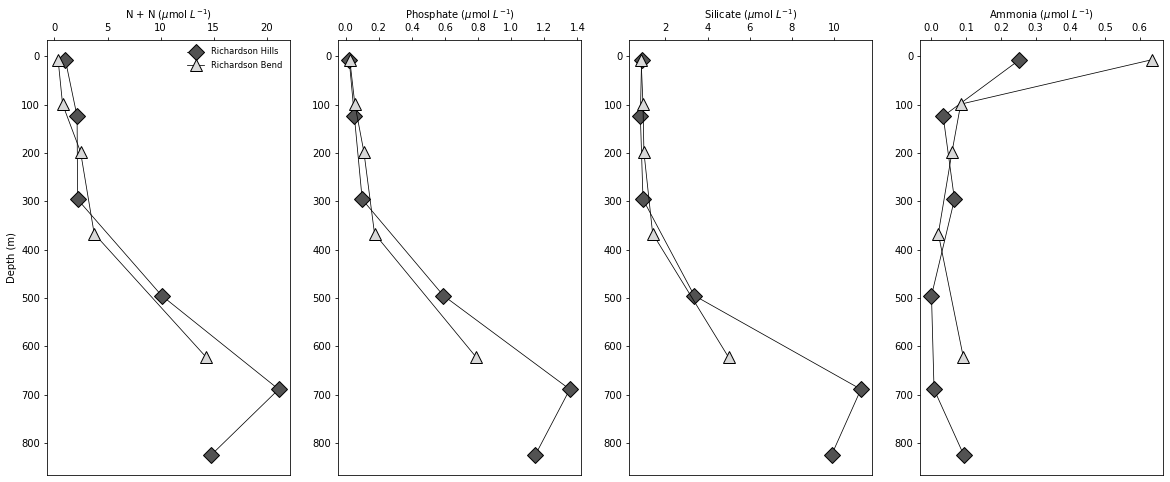

In [15]:
# Changing the color schemes a bit

figs, axs = plt.subplots(1,4, figsize = (20, 8)) # one row, three columns
# figs.suptitle ('Nutrient Depth Profiles')

markersize = 12
# Nitrogen
# axs[0].plot('total n', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=jax, marker='X', markerfacecolor='#525252', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=ble, marker='D', markerfacecolor='#d9d9d9', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[0].plot('total n', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[0].plot('total n', 'depth', data=hills, marker='D', markerfacecolor='#525252', label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)
axs[0].plot('total n', 'depth', data=bend, marker='^', markerfacecolor='#d9d9d9', label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)


axs[0].xaxis.set_label_position('top') # this moves the label to the top
axs[0].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[0].set_xlabel('N + N (' r'$\mu$mol $L^{-1}$)')

axs[0].set_ylim(axs[0].get_ylim()[::-1])
axs[0].set_ylabel('Depth (m)')

# Phosphate
# axs[1].plot('phosphate', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=jax, marker='X', markerfacecolor='#525252', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
# axs[1].plot('phosphate', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB', markeredgecolor = 'black', markersize = 8, color = 'black', linestyle = 'None')
axs[1].plot('phosphate', 'depth', data=hills, marker='D', markerfacecolor='#525252', label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)
axs[1].plot('phosphate', 'depth', data=bend, marker='^', markerfacecolor='#d9d9d9', label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)


# Draw x label
axs[1].xaxis.set_label_position('top') # this moves the label to the top
axs[1].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[1].set_xlabel('Phosphate (' r'$\mu$mol $L^{-1}$)')

# # Draw y label
axs[1].set_ylim(axs[1].get_ylim()[::-1])
# axs[1].set_ylabel('Depth (m)')

# Silicate
# axs[2].plot('silicate', 'depth', data=stet_banks, marker='o', markerfacecolor='#d9d9d9', label = 'Stetson Banks', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=stet_banks2, marker='v', markerfacecolor='#d9d9d9', label = 'Stetson Banks II', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=stet_deep, marker='s', markerfacecolor='#525252', label = 'Stetson Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=jax, marker='X', markerfacecolor='#d9d9d9', label = 'Jacksonville', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=sav, marker='P', markerfacecolor='#525252', label = 'Savannah Deep', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=ble, marker='D', markerfacecolor='#525252', label = 'BLE', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
# axs[2].plot('silicate', 'depth', data=chb, marker='^', markerfacecolor='#d9d9d9', label = 'CHB (Stetson)', markeredgecolor = 'black', markersize = 8, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=hills, marker='D', markerfacecolor='#525252', label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)
axs[2].plot('silicate', 'depth', data=bend, marker='^', markerfacecolor='#d9d9d9', label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)

axs[2].xaxis.set_label_position('top') # this moves the label to the top
axs[2].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[2].set_xlabel('Silicate (' r'$\mu$mol $L^{-1}$)')

axs[2].set_ylim(axs[2].get_ylim()[::-1])
# axs[2].set_ylabel('Depth (m)')

axs[3].plot('ammonia_', 'depth', data=hills, marker='D', markerfacecolor='#525252', label = 'Richardson Hills', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)
axs[3].plot('ammonia_', 'depth', data=bend, marker='^', markerfacecolor='#d9d9d9', label = 'Richardson Bend', markeredgecolor = 'black', markersize = markersize, color = 'black', linewidth = 0.75)
axs[3].set_ylim(axs[3].get_ylim()[::-1])
axs[3].xaxis.set_label_position('top') # this moves the label to the top
axs[3].xaxis.set_ticks_position('top') # this moves the ticks to the top
axs[3].set_xlabel('Ammonia (' r'$\mu$mol $L^{-1}$)')


# Legend
# axs[0].legend(bbox_to_anchor=(1.04,1), loc="upper left", frameon = False)
axs[0].legend(loc = 'best', frameon = False, fontsize = 'small')

# figs.show()
# figs.savefig('ctd-nutrients.pdf', bbox_inches='tight')
figs.savefig('ctd-nutrients.png', dpi = 300, bbox_inches='tight')

# Plotting d15N data
d15N vs depth

In [4]:
no3 = pd.read_csv('~/Documents/GitHub/data/nutrients_d15n.csv', delimiter = ',')
print(no3)
print(no3['site'].unique())


stet_banks = no3[no3.site == 'Stetson Banks']
stet_banks2 = no3[no3.site == 'Stetson Banks II']
stet_deep = no3[no3.site == 'Stetson Deep']
jax = no3[no3.site == 'JAX (Jacksonville)']
sav = no3[no3.site == 'SAV (Savannah deep)']
chb = no3[no3.site == 'CHB  (Stetson)']
ridge = no3[no3.site == 'Blake Ridge']
blake = no3[no3.site == 'Blake Escarpment']
bend = no3[no3.site == 'Richardson Bend']
jack4907 = no3[no3.site == 'Jacksonville-4907-BC1']
jack4684 = no3[no3.site == 'Jacksonville-4684-BC1']
sav4902 = no3[no3.site == 'Savannah-4902-BC1']

hills = no3[no3.site == 'Richardson Hills']
# hills = hills[hills['d15N'] < 10]

vac = no3[no3.site == 'VAC (Virginia Inter-Canyon)']

   sample   id                site      d15N  depth        lat       long
0       7   6a  JAX (Jacksonville)  5.780000  312.0  30.498317 -79.997783
1       9   8a  JAX (Jacksonville)  5.390000  201.0  30.498317 -79.997783
2   9 rep   8a  JAX (Jacksonville)  5.660000  201.0  30.498317 -79.997783
..    ...  ...                 ...       ...    ...        ...        ...
75    NaN  NaN                 NaN       NaN    NaN        NaN        NaN
76    NaN  NaN                 NaN  5.157759    NaN        NaN        NaN
77    NaN  NaN                 NaN  1.283467    NaN        NaN        NaN

[78 rows x 7 columns]
['JAX (Jacksonville)' 'CHB  (Stetson)' 'SAV (Savannah deep)'
 'Stetson Deep' 'Stetson Banks' 'Stetson Banks II' 'Blake Ridge'
 'Blake Escarpment' 'VAC (Virginia Inter-Canyon)' 'Pea Island Seep' 'WIL'
 'Richardson Bend' 'Richardson Hills' 'Jacksonville-4684-BC1'
 'Savannah-4902-BC1' 'Jacksonville-4907-BC1' nan]


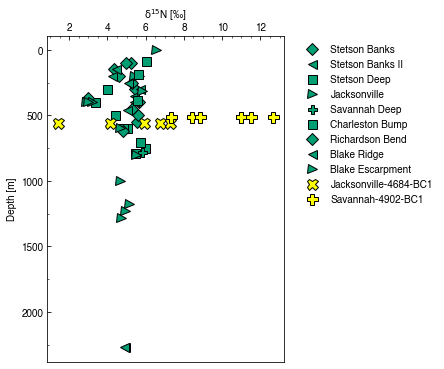

In [8]:
mpl.rc('font',family='Helvetica')
fig = plt.figure(figsize = (4.25,6))
ax = fig.add_subplot(111)

# x = 'd15N'
# y = 'depth'

x,y = 'd15N','depth'

width = 0
size = 9

col1 = '#d73027'
col2 = '#009E73' # #f46d43
col3 = '#fdae61'
col4 = '#fee090'
col5 = '#e0f3f8'
col6 = '#abd9e9'
col7 = '#74add1'
col8 = '#009E73' # #4575b4
col9 = '#313695'

plt.plot(x, y, data=stet_banks, marker='D', markerfacecolor=col2, label = 'Stetson Banks', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_banks2, marker='<', markerfacecolor=col2, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_deep, marker='s', markerfacecolor=col8, label = 'Stetson Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=jax, marker='>', markerfacecolor=col2, label = 'Jacksonville', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=sav, marker='P', markerfacecolor=col8, label = 'Savannah Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=chb, marker='s', markerfacecolor=col2, label = 'Charleston Bump', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=bend, marker='D', markerfacecolor=col8, label = 'Richardson Bend', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=ridge, marker='<', markerfacecolor=col8, label = 'Blake Ridge', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=blake, marker='>', markerfacecolor=col8, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=jack4684, marker='X', markerfacecolor='yellow', label = 'Jacksonville-4684-BC1', markeredgecolor = 'black', markersize = 11, color = 'black', linewidth = width)
plt.plot(x, y, data=sav4902, marker='P', markerfacecolor='yellow', label = 'Savannah-4902-BC1', markeredgecolor = 'black', markersize = 11, color = 'black', linewidth = width)


# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel(r'$\mathrm{\delta}^{15}$N ['u"\u2030]")

# Draw y label
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Depth [m]')

xminor = 0.5
yminor = 250
ax.xaxis.set_minor_locator(MultipleLocator(xminor))
ax.yaxis.set_minor_locator(MultipleLocator(yminor))
ax.tick_params(direction='in', which = 'both')

plt.legend(bbox_to_anchor=(1.04,1), loc="best", frameon = False)

plt.savefig('ctd-d15N.png', dpi = 300, bbox_inches='tight')

plt.show()

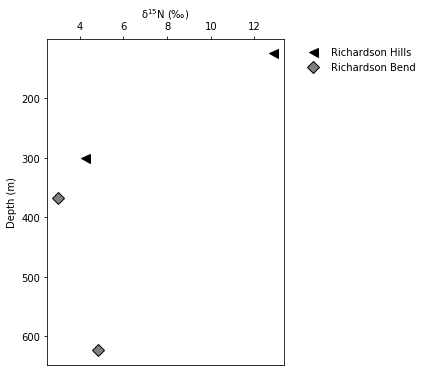

In [19]:
fig = plt.figure(figsize = (4.25,6))
ax = fig.add_subplot(111)

# x = 'd15N'
# y = 'depth'

x,y = 'd15N','depth'

width = 0.5
size = 9

col1 = '#d73027'
col2 = '#f46d43'
col3 = '#fdae61'
col4 = '#fee090'
col5 = '#e0f3f8'
col6 = '#abd9e9'
col7 = '#74add1'
col8 = '#4575b4'
col9 = '#313695'

# plt.plot(x, y, data=stet_banks, marker='D', markerfacecolor=col2, label = 'Stetson Banks', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=stet_banks2, marker='<', markerfacecolor=col2, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=stet_deep, marker='s', markerfacecolor=col8, label = 'Stetson Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=jax, marker='>', markerfacecolor=col2, label = 'Jacksonville', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=sav, marker='P', markerfacecolor=col8, label = 'Savannah Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=chb, marker='s', markerfacecolor=col2, label = 'Charleston Bump', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=bend, marker='D', markerfacecolor=col8, label = 'Richardson Bend', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=ridge, marker='<', markerfacecolor=col8, label = 'Blake Ridge', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
# plt.plot(x, y, data=blake, marker='>', markerfacecolor=col8, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=hills, marker='<', markerfacecolor='black', label = 'Richardson Hills', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = 0.0)
plt.plot(x, y, data=bend, marker='D', markerfacecolor='gray', label = 'Richardson Bend', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = 0.0)


# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel(r'$\mathrm{\delta}^{15}$N ('u"\u2030)")

# Draw y label
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="best", frameon = False)

plt.savefig('ctd-d15N-Brooks.png', dpi = 300, bbox_inches='tight')

plt.show()

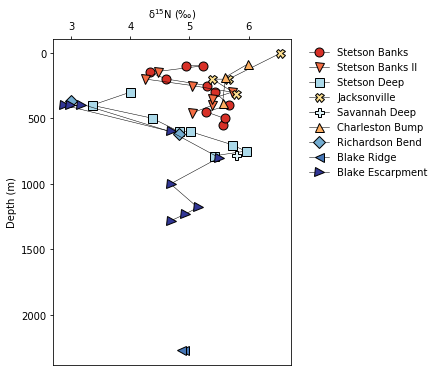

In [54]:
fig = plt.figure(figsize = (4.25,6))
ax = fig.add_subplot(111)

# x = 'd15N'
# y = 'depth'

x,y = 'd15N','depth'

width = 0.5
size = 9

col1 = '#d73027'
col2 = '#f46d43'
col3 = '#fdae61'
col4 = '#fee090'
col5 = '#e0f3f8'
col6 = '#abd9e9'
col7 = '#74add1'
col8 = '#4575b4'
col9 = '#313695'

plt.plot(x, y, data=stet_banks, marker='o', markerfacecolor=col1, label = 'Stetson Banks', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_banks2, marker='v', markerfacecolor=col2, label = 'Stetson Banks II', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=stet_deep, marker='s', markerfacecolor=col6, label = 'Stetson Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=jax, marker='X', markerfacecolor=col4, label = 'Jacksonville', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=sav, marker='P', markerfacecolor=col5, label = 'Savannah Deep', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=chb, marker='^', markerfacecolor=col3, label = 'Charleston Bump', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=bend, marker='D', markerfacecolor=col7, label = 'Richardson Bend', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=ridge, marker='<', markerfacecolor=col8, label = 'Blake Ridge', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)
plt.plot(x, y, data=blake, marker='>', markerfacecolor=col9, label = 'Blake Escarpment', markeredgecolor = 'black', markersize = size, color = 'black', linewidth = width)


# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel(r'$\mathrm{\delta}^{15}$N ('u"\u2030)")

# Draw y label
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Depth (m)')

plt.legend(bbox_to_anchor=(1.04,1), loc="best", frameon = False)

plt.savefig('ctd-d15N.png', dpi = 200, bbox_inches='tight')

plt.show()

## Bermuda Atlantic Time Series data

In [14]:
bats = pd.read_csv('~/Documents/GitHub/data/bats_bottle.txt',
                 sep=',',     # field separator
                 comment='#', # comment
                 delimiter = ','
#                  index_col=0, # number or label of index column
                 )

In [15]:
bats

,Id,\t yyyymmdd,\t decy,\ttime,latN,\t lonW,\tDepth,Temp,\t CTD_S,\t Sal1,...,\t POP,\t TDP,SRP,BSi,LSi,\t Pro,\t Syn,\t Piceu,\t Naneu,Unnamed: 34
0,1000100112\t 19881020\t1988.80257\t 2230\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000100111\t 19881020\t1988.80257\t 2230\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000100110\t 19881020\t1988.80257\t 2230\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51512,1033101722\t 20161216\t2016.95726\t 832\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51513,1033101723\t 20161216\t2016.95726\t 832\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51514,1033101724\t 20161216\t2016.95726\t 832\t 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plotting collection sites with cartopy

In [79]:
# Collection site coordinates
df = df.sort_values('lat')

sites_lat = df['lat'].unique()
sites_lon = df['lon'].unique()
names = df['site'].unique()

names

array(['BLE (30N deep)', 'JAX (Jacksonville)', 'Blake Deep',
       'Blake Escarpment', 'Savannah Banks', 'Richardson Bend',
       'Stetson Shallow', 'Richardson Hills-RB', 'Richardson Hills',
       'Stetson Banks', 'Stetson Deep', 'SAV (Savannah deep)',
       'CHB (Stetson)', 'Stetson Banks II', 'Blake Ridge', 'WIL',
       'Pamlico Canyon', 'HC', 'KC', 'Pea Island Seep', 'NK',
       'VAC (Virginia Inter-Canyon)'], dtype=object)

In [80]:
sites_lat # Everything should be in order now

array([29.249533, 30.498317, 31.313407, 31.3249  , 31.744437, 31.806705,
       31.806712, 31.89211 , 31.89457 , 31.985337, 31.985552, 32.0118  ,
       32.036517, 32.0407  , 32.063417, 32.0727  , 32.49062 , 33.590333,
       34.923123, 35.28017 , 35.2945  , 35.3     , 35.5295  , 35.53733 ,
       35.54517 , 35.709223, 35.71367 , 35.71533 , 35.72367 , 37.240383])

In [81]:
# May have issues with arrays, convert to lists
sites_lat = sites_lat.tolist()
sites_lon = sites_lon.tolist()

In [82]:
for i in zip(sites_lat,sites_lon):
    print(i)

(29.249533000000003, -78.348283)
(30.498317, -79.997783)
(31.313407, -77.22130200000001)
(31.3249, -77.2403)
(31.744436999999998, -79.209958)
(31.806704999999997, -77.59360500000001)
(31.806712, -77.593747)
(31.89211, -78.454433)
(31.89457, -77.365077)
(31.985337, -77.418173)
(31.985552000000002, -77.41849300000001)
(32.0118, -78.3132)
(32.036516999999996, -77.35458299999999)
(32.0407, -77.35006700000001)
(32.063417, -78.38265)
(32.0727, -78.3094)
(32.49062, -76.1926)
(33.590333, -76.447017)
(34.923123, -75.151212)
(35.28017, -74.91634)
(35.2945, -74.94516999999999)
(35.3, -74.9625)
(35.5295, -74.835)
(35.53733, -74.81518)
(35.54517, -74.78633)
(35.709223, -74.780567)
(35.71367, -74.82584)
(35.71533, -74.81517)
(35.72367, -74.78883)
(37.240383, -74.5177)


In [5]:
# proj = cartopy.crs.Robinson(central_longitude=-40)
# pc = cartopy.crs.PlateCarree()

# x0 = -86
# x1 = -70
# y0 = 38
# y1 = 24

# fig = plt.figure(figsize=(14,6))
# ax = fig.add_subplot(111, projection=proj)
# ax.coastlines(linewidth=0.75, color = 'black', resolution = '10m')
# ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='0.75')
# ax.gridlines()
# ax.set_extent([x0,x1,y0,y1])
# ax.get_extent(crs=None)

# x,y = sites_lon, sites_lat

In [4]:
# proj = cartopy.crs.Robinson(central_longitude=-40)
# pc = cartopy.crs.PlateCarree()

# x0 = -86
# x1 = -70
# y0 = 38
# y1 = 24

# fig = plt.figure(figsize=(14,6))
# ax = fig.add_subplot(111, projection=proj)
# ax.coastlines(linewidth=0.75, color = 'black', resolution = '10m')
# ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='0.75')
# ax.gridlines()
# ax.set_extent([x0,x1,y0,y1])
# ax.get_extent(crs=None)
    
# plt.plot(sites_lon, sites_lat,'ro', color = "yellow", markeredgecolor = "black",
#          transform=pc, label = names)
# plt.legend()

In [219]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np
 
# map = Basemap(projection='merc', lat_0 = 32, lon_0 = -80,
#     resolution = 'l', area_thresh = 0.1,
#     llcrnrlon=x1, llcrnrlat=y1,
#     urcrnrlon=x0, urcrnrlat=y0)
 
# map.drawcoastlines()
# map.drawcountries()
# map.fillcontinents(color = 'coral')
# map.drawmapboundary()
 
# lons = sites_lon
# lats = sites_lat


# x,y = map(lons, lats)
# map.plot(x, y, 'bo', markersize=18)
 
# labels = names
# for label, xpt, ypt in zip(labels, x, y):
#     plt.text(xpt+10000, ypt+5000, label)
 
# plt.show()

In [221]:
names.shape

(15,)